# Libraries

In [1]:


# Core libraries
import os
import io
import re
import json
import ast
import time
import zipfile
import warnings
import math
import pickle
from datetime import datetime
from dateutil.relativedelta import relativedelta

# Data handling
import numpy as np
import pandas as pd

# Excel handling
import openpyxl
import pyxlsb

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical tools
from scipy.stats import entropy, norm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Binning and feature engineering
import optbinning
from optbinning import BinningProcess, ContinuousOptimalBinning, OptimalBinning

# Machine learning - Scikit-learn
from sklearn.model_selection import (
    train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score
)

from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
)

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import metrics, preprocessing
from sklearn.datasets import make_classification
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    make_scorer, balanced_accuracy_score, roc_curve
)


from catboost import CatBoostClassifier

# XGBoost & LightGBM
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

# Streamlit (for UI/app development)
import streamlit as st
from streamlit.runtime.scriptrunner import RerunException, get_script_run_ctx


# Folder Path

In [2]:
path_main=rf"D:\Pranto\Working\Collection Model\Collection New Model\3 to 3 Plus MHCV\Data\V3 New Model\Model Used Files"

# Main data file name
file_name_main = "3 TO 3 PLUS JAN24 TO MAR25_MHCV_MODEL_Overall Data_apply_binning_Data"

# import

In [3]:
try:
    df=pd.read_csv(rf"{path_main}\{file_name_main}.csv",encoding='latin-1')

except:
    df=pd.read_excel(rf"{path_main}\{file_name_main}.xlsx")

# data shape
print(f"Data shape: {df.shape}")
df.head(3)

Data shape: (63089, 273)


,CONNO,TENURE,SCHEME_FINPROD,IRR_CUSTOMER,ASSET_COST,PDC_FLAG,COMPANY_CODE,COLLECTION_TILL_DATE,SOHP,BPNO,...,RollFw3_WOE,RollFw6_WOE,Roll_stable_1_WOE,Roll_stable_2_WOE,Roll_stable_3_WOE,Roll_stable_6_WOE,remain_per_WOE,CE_WOE,tenure_left1_WOE,LTV_WOE
0,5002495348,80,LOAN,11.816,2942396.0,NACH,5000,4595454.00,0.00,2002405943,...,-0.789684,-0.132292,-0.95993,-1.156329,-0.666584,0.028918,0.128949,0.201777,0.147363,-0.01411
1,5002495514,79,SWEEP_GROSS,7.789,3257058.0,Waiver,5000,3643266.68,406305.28,2003094463,...,-1.721023,-0.867795,-0.95993,-1.156329,-1.328308,-0.632639,0.128949,0.201777,0.147363,-0.01411
2,5002495516,79,SWEEP_GROSS,7.789,3257058.0,Waiver,5000,3651929.34,406305.28,2003094463,...,-1.721023,-0.867795,-0.95993,-1.156329,-1.328308,-0.632639,0.128949,0.201777,0.147363,-0.01411


In [4]:
df.columns.tolist()

['CONNO',
 'TENURE',
 'SCHEME_FINPROD',
 'IRR_CUSTOMER',
 'ASSET_COST',
 'PDC_FLAG',
 'COMPANY_CODE',
 'COLLECTION_TILL_DATE',
 'SOHP',
 'BPNO',
 'ODAMT',
 'COLLECTION_MONTH',
 'FIRST_EMI',
 'EMI',
 'TRACK_RECORD',
 'ODBKT',
 'TECH_WRITE_OFF',
 'STATUS',
 'INCEPTION_MONTH',
 'MOB',
 'SOHPOD',
 'SOHPOD_PREASSIGN',
 'SOHPOD_MOB1PLUS',
 'SOHPOD_MOB2PLUS',
 'SOHPOD_MOB3PLUS',
 'SOHPOD_MOB4PLUS',
 'SOHPOD_MOB5PLUS',
 'SOHPOD_MOB6PLUS',
 'MONTH',
 'Delinquency_Y',
 'STATUS_V1',
 'c1',
 'c2',
 'c3',
 'c4',
 'c5',
 'c6',
 'c7',
 'c8',
 'c9',
 'c10',
 'c11',
 'c12',
 'EMI_PAST12M',
 'DELSTRING_PAST24M',
 'max_DPD',
 'DPDSTRING_PAST24M',
 'max_odbkt',
 'Ever_30',
 'Ever_60',
 'Ever_90',
 'FIN_AMOUNT',
 'PRODUCT',
 'NORM',
 'VEH_USAGE',
 'FINPROD',
 'BRANCH_CODE',
 'APPLICATION_USAGE',
 'ASSET_CATEGORY',
 'ASSET_CATEGORY1',
 'ASSET_CATEGORY2',
 'BUSINESS_SEGMENT',
 'BRANCH',
 'ZONE',
 'STATE',
 'REGION',
 'CUSTOMER_SEGMENT',
 'CUST_SEG',
 'LTV',
 'COMPANY_INDIVIDUAL',
 'DSA_DLR',
 'SOURCING',
 'A

# Input

In [5]:
columns_name_selcetion = '_WOE'
columns_last_name = [col for col in df.columns if columns_name_selcetion in col]
columns_last_name

['PDC_FLAG_WOE',
 'APPLICATION_USAGE_WOE',
 'ASSET_CATEGORY_WOE',
 'BRANCH_WOE',
 'CUST_SEG_WOE',
 'COMPANY_INDIVIDUAL_WOE',
 'DSA_DLR_WOE',
 'Restructuring_Flag_WOE',
 'PRODUCT_New_WOE',
 'Seasonality_WOE',
 'ASSET_CATEGORY2_WOE',
 'SOURCING_WOE',
 'IRR_CUSTOMER_WOE',
 'MOB_WOE',
 'max_odbkt_WOE',
 'due_date_WOE',
 'last_Month_coll_WOE',
 'nuof_EMI_L3M_WOE',
 'nuof_EMI_L6M_WOE',
 'MaxBkt_24M_WOE',
 'CountInBkt_3_3M_WOE',
 'CountInBkt_3_6M_WOE',
 'CountInBkt_3Plus_24M_WOE',
 'EverInBkt_2_3M_WOE',
 'EverInBkt_2_6M_WOE',
 'RollFw1_WOE',
 'RollFw2_WOE',
 'RollFw3_WOE',
 'RollFw6_WOE',
 'Roll_stable_1_WOE',
 'Roll_stable_2_WOE',
 'Roll_stable_3_WOE',
 'Roll_stable_6_WOE',
 'remain_per_WOE',
 'CE_WOE',
 'tenure_left1_WOE',
 'LTV_WOE']

In [6]:
df['MONTH'].unique()

array(['DEC24', 'JAN24', 'FEB24', 'MAR24', 'APR24', 'MAY24', 'JUN24',
       'JUL24', 'NOV24', 'AUG24', 'SEP24', 'OCT24', 'JAN25', 'FEB25',
       'MAR25'], dtype=object)

In [7]:
# Model used variables
# final_variables_list=columns_last_name #Variable with last name _WOE
final_variables_list=[  #Variable without last name _WOE
'PDC_FLAG_WOE',
'ASSET_CATEGORY_WOE',
'BRANCH_WOE',
'CUST_SEG_WOE',
'COMPANY_INDIVIDUAL_WOE',
'DSA_DLR_WOE',
'Seasonality_WOE',
'ASSET_CATEGORY2_WOE',
'SOURCING_WOE',
'IRR_CUSTOMER_WOE',
'MOB_WOE',
'max_odbkt_WOE',
'due_date_WOE',
'last_Month_coll_WOE',
'nuof_EMI_L3M_WOE',
'nuof_EMI_L6M_WOE',
'MaxBkt_24M_WOE',
'CountInBkt_3_3M_WOE',
'CountInBkt_3_6M_WOE',
'CountInBkt_3Plus_24M_WOE',
'EverInBkt_2_3M_WOE',
'EverInBkt_2_6M_WOE',
'RollFw1_WOE',
'RollFw2_WOE',
'RollFw3_WOE',
'RollFw6_WOE',
'Roll_stable_1_WOE',
'Roll_stable_2_WOE',
'Roll_stable_3_WOE',
'Roll_stable_6_WOE',
'remain_per_WOE',
'CE_WOE',
'tenure_left1_WOE',
'LTV_WOE',

]

In [189]:
df['MONTH'].unique()

array(['DEC24', 'JAN24', 'FEB24', 'MAR24', 'APR24', 'MAY24', 'JUN24',
       'JUL24', 'NOV24', 'AUG24', 'SEP24', 'OCT24', 'JAN25', 'FEB25',
       'MAR25'], dtype=object)

In [ ]:
# Target Columns
selected__target_column ='TARGET_VARIABLE_V1'

# Key Columns
drop_columns1=['CONNO','BPNO','ODBKT','SOHPOD','SOHPOD_PREASSIGN']



# Selected columns for separate train and test data
# month='NONE' # Don't want to select train and test data based on month
month='MONTH'


month_column=month

# Selected months for train data
train_months=[
'JAN24', 'FEB24', 'MAR24', 'APR24', 'MAY24', 'JUN24','JUL24', 'AUG24', 'SEP24',
        'OCT24', 'NOV24', 'DEC24'
]

test_months=[
'JAN25', 'FEB25',
       'MAR25'
]


# Select Models diff_models=['Logistic Regression', 'Random Forest', 'Decision Tree', 'XGBoost', 'LightGBM', 'CatBoost']
# Define model names
diff_models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'XGBoost', 'LightGBM', 'CatBoost']
models_prev = 'Random Forest'
models = 'Random Forest'

  # Model Building Steps

In [191]:
# if models_prev=="Logistic Regression":
#     model_prev = LogisticRegression(random_state=42)
#     pass
# elif models_prev=="Random Forest":
#     model_prev=RandomForestClassifier(n_estimators=500, random_state=42) 
#     pass
# elif models_prev=="Decision Tree":
#     model_prev=DecisionTreeClassifier(random_state=42)
#     pass
# elif models_prev=="XGBoost":
#     model_prev=xgb.XGBClassifier(n_estimators=500, random_state=42)
#     pass
# elif models_prev=="LightGBM":
#     model_prev=lgb.LGBMClassifier(n_estimators=500, random_state=42)
#     pass
# elif models_prev=="CatBoost":
#     model_prev=CatBoostClassifier(iterations=500, random_state=42, verbose=0)
#     pass
# ##############################################################################3

# if models=="Logistic Regression":
#     model = LogisticRegression(random_state=42)
#     pass
# elif models=="Random Forest":
#     model=RandomForestClassifier(n_estimators=500, random_state=42) 
#     pass
# elif models=="Decision Tree":
#     model=DecisionTreeClassifier(random_state=42)
#     pass
# elif models=="XGBoost":
#     model=xgb.XGBClassifier(n_estimators=500, random_state=42)
#     pass
# elif models=="LightGBM":
#     model=lgb.LGBMClassifier(n_estimators=500, random_state=42)
#     pass
# elif models=="CatBoost":
#     model=CatBoostClassifier(iterations=500, random_state=42, verbose=0)
#     pass
# ##############################################################################3

# #############%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
#     #############%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

#     #############%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
#     #############%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

# # Model Building steps started


# # Model used Variables
# drop_columns=drop_columns1+[selected__target_column]+[month]
# other_columns=final_variables_list

#     # st.write(drop_columns1)
#     # st.write(other_columns)

#     # required columns

    

# # Data 
# df=df[drop_columns+other_columns]
# DATA=df

# if month=="NONE":
#     train_data=df
# else:
#     train_data = df[df[month].isin(train_months)]


# X_train = train_data.drop(drop_columns, axis=1)
# y_train = train_data[selected__target_column]
# model_prev.fit(X_train, y_train)

# # # Loop through each test month and evaluate the model
#     # for months in test_months:
        
#     #     test_data = DATA[DATA[month] == months]
        

#     #     # Separate features (X) and target (y) for testing data
#     #     X_test = test_data.drop(drop_columns, axis=1)
#     #     y_test = test_data[selected__target_column]

#     #     # Apply the optimal threshold to the test set
#     #     y_pred = model.predict_proba(X_test)[:, 1]

#     # @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
#     # Check Feature Importance and multicolinearity for Logistic Regression

# if model_prev=="Logistic Regression":
#     # Calculate the Multicolinearity and select the variables like feature importance
#     # Calculate VIF for each feature
#     importance_df = pd.DataFrame()
    

#     importance_df["Feature"] = X_train.columns
#     importance_df["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
#     importance_df = importance_df.sort_values("VIF", ascending=True)
#     importance_df = importance_df.reset_index(drop=True)
#     features=importance_df['Feature'].tolist()

#     # importance_df

    

# else:



#     # Get feature importances
#     feature_importances = model_prev.feature_importances_
#     # features = columns
#     features = X_train.columns.to_list()

#     # Create a DataFrame to display feature importances
#     importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances.round(5)})
#     importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index()

# importance_df

    
    


# Cross Validation

In [ ]:




# Define param grids
param_grids = {
    "Logistic Regression": {
        'C': [0.01, 0.1, 1.0, 10],
        'solver': ['lbfgs'],
        'max_iter': [100, 200]
    },
    "Random Forest": {
        'n_estimators': [100, 300, 500],
        'max_depth': [5, 10, None],
        'min_samples_split': [2, 5]
    },
    "Decision Tree": {
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10]
    },
    "XGBoost": {
        'n_estimators': [100, 300, 500],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2]
    },
    "LightGBM": {
        'n_estimators': [100, 300, 500],
        'max_depth': [3, 5, 7, -1],
        'learning_rate': [0.01, 0.1, 0.2]
    },
    "CatBoost": {
        'iterations': [100, 300, 500],
        'depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1],
        'verbose': [0]
    }
}

# Define base models
base_models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(random_state=42),
    "LightGBM": lgb.LGBMClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(random_state=42, verbose=0)
}

# Prepare data
df = df[drop_columns + other_columns]
DATA = df
train_data = df if month == "NONE" else df[df[month].isin(train_months)]

X_train = train_data.drop(drop_columns, axis=1)
y_train = train_data[selected__target_column]

# Perform Grid Search CV for models_prev
grid_prev = GridSearchCV(estimator=base_models[models_prev], 
                         param_grid=param_grids[models_prev], 
                         cv=3, scoring='roc_auc', n_jobs=-1,verbose=2)
grid_prev.fit(X_train, y_train)
model_prev = grid_prev.best_estimator_

# Perform Grid Search CV for models (main model to be used)
grid_main = GridSearchCV(estimator=base_models[models], 
                         param_grid=param_grids[models], 
                         cv=3, scoring='roc_auc', n_jobs=-1,verbose=2)
grid_main.fit(X_train, y_train)
model = grid_main.best_estimator_

# Feature Importance / VIF
if models_prev == "Logistic Regression":
    # Optional: Scale data for VIF
    scaler = StandardScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

    importance_df = pd.DataFrame()
    importance_df["Feature"] = X_train.columns
    importance_df["VIF"] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_train.shape[1])]
    importance_df = importance_df.sort_values("VIF", ascending=True).reset_index(drop=True)
    features = importance_df['Feature'].tolist()

else:
    feature_importances = model_prev.feature_importances_
    features = X_train.columns.to_list()
    importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances.round(5)})
    importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)




Fitting 3 folds for each of 18 candidates, totalling 54 fits
Fitting 3 folds for each of 18 candidates, totalling 54 fits
                     Feature  Importance
0                DSA_DLR_WOE     0.16072
1        CountInBkt_3_3M_WOE     0.10795
2        CountInBkt_3_6M_WOE     0.09901
3        last_Month_coll_WOE     0.09678
4          Roll_stable_1_WOE     0.06846
5               due_date_WOE     0.05666
6                RollFw3_WOE     0.05060
7                RollFw1_WOE     0.04803
8          Roll_stable_2_WOE     0.04196
9           nuof_EMI_L3M_WOE     0.03890
10               RollFw2_WOE     0.03503
11                BRANCH_WOE     0.03000
12         Roll_stable_3_WOE     0.02885
13              CUST_SEG_WOE     0.01862
14        EverInBkt_2_3M_WOE     0.01849
15                    CE_WOE     0.01704
16          IRR_CUSTOMER_WOE     0.01437
17               RollFw6_WOE     0.01303
18          nuof_EMI_L6M_WOE     0.00943
19    COMPANY_INDIVIDUAL_WOE     0.00789
20               

In [194]:
model_prev

RandomForestClassifier(max_depth=5, n_estimators=500, random_state=42)

In [195]:
model

RandomForestClassifier(max_depth=5, n_estimators=500, random_state=42)

In [196]:
# Show importance
importance_df

,Feature,Importance
0,DSA_DLR_WOE,0.16072
1,CountInBkt_3_3M_WOE,0.10795
2,CountInBkt_3_6M_WOE,0.09901
3,last_Month_coll_WOE,0.09678
4,Roll_stable_1_WOE,0.06846
5,due_date_WOE,0.05666
6,RollFw3_WOE,0.05060
7,RollFw1_WOE,0.04803
8,Roll_stable_2_WOE,0.04196
9,nuof_EMI_L3M_WOE,0.03890


# Top 10 features

In [197]:


number_of_features=23

top_features = importance_df.head(number_of_features)['Feature'].values.tolist()

# Get the indices of the top features in the original feature set
top_features_indices = [features.index(f) for f in top_features]

top_features



['DSA_DLR_WOE',
 'CountInBkt_3_3M_WOE',
 'CountInBkt_3_6M_WOE',
 'last_Month_coll_WOE',
 'Roll_stable_1_WOE',
 'due_date_WOE',
 'RollFw3_WOE',
 'RollFw1_WOE',
 'Roll_stable_2_WOE',
 'nuof_EMI_L3M_WOE',
 'RollFw2_WOE',
 'BRANCH_WOE',
 'Roll_stable_3_WOE',
 'CUST_SEG_WOE',
 'EverInBkt_2_3M_WOE',
 'CE_WOE',
 'IRR_CUSTOMER_WOE',
 'RollFw6_WOE',
 'nuof_EMI_L6M_WOE',
 'COMPANY_INDIVIDUAL_WOE',
 'MOB_WOE',
 'SOURCING_WOE',
 'EverInBkt_2_6M_WOE']

# Filter columns from top features

In [198]:
top_features=[
'BRANCH_WOE',
 'DSA_DLR_WOE',
 'due_date_WOE',
 'CUST_SEG_WOE',
 'SOURCING_WOE',
 'nuof_EMI_L6M_WOE',
 'CountInBkt_3_6M_WOE',
 'MOB_WOE',
 'tenure_left1_WOE',
#  'ASSET_CATEGORY_WOE',
 'IRR_CUSTOMER_WOE',
 'Seasonality_WOE',
 'ASSET_CATEGORY2_WOE',
 'Roll_stable_6_WOE',
 'RollFw6_WOE',
 'last_Month_coll_WOE',
#  'CountInBkt_3_3M_WOE',
 'remain_per_WOE',
#  'RollFw3_WOE',
#  'nuof_EMI_L3M_WOE',
 'CE_WOE',
#  'Roll_stable_3_WOE',
 'COMPANY_INDIVIDUAL_WOE'
    
]

# Check Multicolinearity

In [199]:
importance_df = pd.DataFrame()
    

importance_df["Feature"] = top_features
importance_df["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(len(top_features))]
importance_df = importance_df.sort_values("VIF", ascending=True)
importance_df = importance_df.reset_index(drop=True)
features=importance_df['Feature'].tolist()

importance_df

,Feature,VIF
0,CountInBkt_3_6M_WOE,1.021110
1,MOB_WOE,1.087273
2,BRANCH_WOE,1.097888
3,Roll_stable_6_WOE,1.124270
4,DSA_DLR_WOE,1.171619
5,nuof_EMI_L6M_WOE,1.254507
6,due_date_WOE,1.265925
7,tenure_left1_WOE,1.668485
8,SOURCING_WOE,1.750081
9,IRR_CUSTOMER_WOE,2.118379


# Select Final Features based on Multicolinearity

In [200]:


number_of_features=13

top_features = importance_df.head(number_of_features)['Feature'].values.tolist()

# Get the indices of the top features in the original feature set
top_features_indices = [features.index(f) for f in top_features]

top_features



['CountInBkt_3_6M_WOE',
 'MOB_WOE',
 'BRANCH_WOE',
 'Roll_stable_6_WOE',
 'DSA_DLR_WOE',
 'nuof_EMI_L6M_WOE',
 'due_date_WOE',
 'tenure_left1_WOE',
 'SOURCING_WOE',
 'IRR_CUSTOMER_WOE',
 'CUST_SEG_WOE',
 'Seasonality_WOE',
 'ASSET_CATEGORY2_WOE']

# Check Variable importance Again

In [201]:

X_train1 = X_train[top_features]
y_train1 = train_data[selected__target_column]
model_prev.fit(X_train1, y_train1)



# Check Feature Importance and multicolinearity for Logistic Regression

if model_prev=="Logistic Regression":
    # Calculate the Multicolinearity and select the variables like feature importance
    # Calculate VIF for each feature
    importance_df = pd.DataFrame()
    

    importance_df["Feature"] = top_features
    importance_df["VIF"] = [variance_inflation_factor(X_train1.values, i) for i in range(top_features)]
    importance_df = importance_df.sort_values("VIF", ascending=True)
    importance_df = importance_df.reset_index(drop=True)
    features=importance_df['Feature'].tolist()

    # importance_df

    

else:



    # Get feature importances
    feature_importances = model_prev.feature_importances_
    # features = columns
    features = top_features

    # Create a DataFrame to display feature importances
    importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances.round(5)})
    importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index()

importance_df

    

,index,Feature,Importance
0,0,CountInBkt_3_6M_WOE,0.30982
1,4,DSA_DLR_WOE,0.28355
2,5,nuof_EMI_L6M_WOE,0.10057
3,3,Roll_stable_6_WOE,0.07247
4,6,due_date_WOE,0.06736
5,2,BRANCH_WOE,0.06539
6,9,IRR_CUSTOMER_WOE,0.03288
7,10,CUST_SEG_WOE,0.02782
8,1,MOB_WOE,0.02045
9,8,SOURCING_WOE,0.00981


# Select Final Features based on Variable Importance Again

In [314]:


number_of_features=9

top_features = importance_df.head(number_of_features)['Feature'].values.tolist()

# Get the indices of the top features in the original feature set
top_features_indices = [features.index(f) for f in top_features]

top_features



['CountInBkt_3_6M_WOE',
 'DSA_DLR_WOE',
 'nuof_EMI_L6M_WOE',
 'Roll_stable_6_WOE',
 'due_date_WOE',
 'BRANCH_WOE',
 'IRR_CUSTOMER_WOE',
 'CUST_SEG_WOE',
 'MOB_WOE']

In [315]:
# top_features=[
#   'last_Month_coll_WOE',
#  'CountInBkt_3_6M_WOE',
#  'DSA_DLR_WOE',
#  'due_date_WOE',
#  'MaxBkt_24M_WOE',
#  'nuof_EMI_L3M_WOE',
#  'MOB_WOE',
#  'Seasonality_WOE',
#  'BRANCH_WOE',
#  'Roll_stable_2_WOE',
#  'CUST_SEG_WOE',
#  'COMPANY_INDIVIDUAL_WOE',
#  'RollFw3_WOE',
#  'CE_WOE',
# #  'CountInBkt_3Plus_24M_WOE',
# #  'EverInBkt_2_3M_WOE',
# #  'EverInBkt_2_6M_WOE',
# #  'LTV_WOE',
# #  'max_odbkt_WOE'  
# ]

In [316]:

#############%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
#############%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

# Define the ks_table function
def ks_table(data_frame, pred_col_name='Probability', true_col_name='Target', responder_default=1, dec_no=10):
    ascending_df = data_frame.sort_values(by=pred_col_name, ascending=False)
    length_df = len(data_frame)
    decile_len = length_df // dec_no
    total_resp = data_frame[true_col_name].value_counts().loc[1]
    total_non_resp = data_frame[true_col_name].value_counts().loc[0]
    temp_ks = pd.DataFrame({
        'Decile': [i + 1 for i in range(dec_no)],
        'Total Population': [decile_len] * dec_no,
        'Max Probability': [np.nan] * dec_no,
        'Min Probability': [np.nan] * dec_no,
        'Good': [np.nan] * dec_no,
        'Bad': [np.nan] * dec_no,
        'Good %': [np.nan] * dec_no,
        'Bad %': [np.nan] * dec_no,
        'Cumulative Good %': [np.nan] * dec_no,
        'Cumulative Bad %': [np.nan] * dec_no,
        'Difference': [np.nan] * dec_no
    })
    cum_prec_responders = 0
    cum_prec_non_responders = 0
    for j in range(dec_no):
        if j < dec_no - 1:
            temp_df = ascending_df.iloc[decile_len * j:decile_len * (j + 1)]
        else:
            temp_df = ascending_df.iloc[decile_len * j:]
        min_prob = min(temp_df[pred_col_name])
        max_prob = max(temp_df[pred_col_name])
        try:
            non_responders = temp_df[true_col_name].value_counts().loc[0]
        except KeyError:
            non_responders = 0
        try:
            responders = temp_df[true_col_name].value_counts().loc[1]
        except KeyError:
            responders = 0
        prec_responders = responders / total_resp
        prec_non_responders = non_responders / total_non_resp
        cum_prec_responders = prec_responders + cum_prec_responders
        cum_prec_non_responders = prec_non_responders + cum_prec_non_responders
        diff = cum_prec_responders - cum_prec_non_responders
        temp_ks.loc[j, 'Max Probability'] = format(max_prob, 'f')
        temp_ks.loc[j, 'Min Probability'] = format(min_prob, 'f')
        temp_ks.loc[j, 'Good'] = int(non_responders)
        temp_ks.loc[j, 'Bad'] = int(responders)
        temp_ks.loc[j, 'Good %'] = prec_non_responders
        temp_ks.loc[j, 'Bad %'] = prec_responders
        temp_ks.loc[j, 'Cumulative Good %'] = cum_prec_non_responders
        temp_ks.loc[j, 'Cumulative Bad %'] = cum_prec_responders
        temp_ks.loc[j, 'Difference'] = format(diff, 'f')

    return temp_ks

# Define the ks_table_TEST function
def ks_table_TEST(data_frame, pred_col_name='Probability', true_col_name='Target', responder_default=1, dec_no=10, min_max_ranges=None):
    if min_max_ranges is None or len(min_max_ranges) != dec_no:
        raise ValueError("min_max_ranges must be provided and should have a length equal to dec_no")

    # Sort the DataFrame by the prediction probabilities in descending order
    ascending_df = data_frame.sort_values(by=pred_col_name, ascending=False)
    
    # Prepare the KS table DataFrame
    temp_ks = pd.DataFrame({
        'Decile': [i + 1 for i in range(dec_no)],
        'Total Population': [np.nan] * dec_no,
        'Max Probability': [np.nan] * dec_no,
        'Min Probability': [np.nan] * dec_no,
        'Good': [np.nan] * dec_no,
        'Bad': [np.nan] * dec_no,
        'Good %': [np.nan] * dec_no,
        'Bad %': [np.nan] * dec_no,
        'Cumulative Good %': [np.nan] * dec_no,
        'Cumulative Bad %': [np.nan] * dec_no,
        'Difference': [np.nan] * dec_no
    })
    
    total_resp = data_frame[true_col_name].value_counts().get(1, 0)
    total_non_resp = data_frame[true_col_name].value_counts().get(0, 0)
    
    cum_prec_responders = 0
    cum_prec_non_responders = 0

    for j in range(dec_no):
        min_prob, max_prob = min_max_ranges[j]
        
        # Filter rows in the current decile range
        temp_df = ascending_df[(ascending_df[pred_col_name] >= min_prob) & (ascending_df[pred_col_name] <= max_prob)]
        
        total_pop = len(temp_df)
        non_responders = temp_df[true_col_name].value_counts().get(0, 0)
        responders = temp_df[true_col_name].value_counts().get(1, 0)
        
        prec_responders = responders / total_resp if total_resp != 0 else 0
        prec_non_responders = non_responders / total_non_resp if total_non_resp != 0 else 0
        
        cum_prec_responders += prec_responders
        cum_prec_non_responders += prec_non_responders
        
        diff = cum_prec_responders - cum_prec_non_responders
        
        temp_ks.loc[j, 'Total Population'] = total_pop
        temp_ks.loc[j, 'Max Probability'] = format(max_prob, 'f')
        temp_ks.loc[j, 'Min Probability'] = format(min_prob, 'f')
        temp_ks.loc[j, 'Good'] = int(non_responders)
        temp_ks.loc[j, 'Bad'] = int(responders)
        temp_ks.loc[j, 'Good %'] = prec_non_responders
        temp_ks.loc[j, 'Bad %'] = prec_responders
        temp_ks.loc[j, 'Cumulative Good %'] = cum_prec_non_responders
        temp_ks.loc[j, 'Cumulative Bad %'] = cum_prec_responders
        temp_ks.loc[j, 'Difference'] = format(diff, 'f')
    
    return temp_ks

In [317]:


if month=="NONE":

    # # Separate features (X) and target (y) for training data
    X_train = train_data.drop(drop_columns, axis=1)
    # y_train = train_data['TARGET']

    # X_train=X_train_selected
    # X_train=X_train.iloc[:, top_features_indices]
    X_train=X_train[top_features]
    y_train=train_data[selected__target_column]




    # Fit the model
    model.fit(X_train,y_train)

    # Calculate the optimal threshold based on ROC curve for training data
    y_prob_cutoff_train = model.predict_proba(X_train)[:, 1]
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_prob_cutoff_train)
    optimal_idx_train = np.argmax(tpr_train - fpr_train)
    optimal_threshold = thresholds_train[optimal_idx_train]

    y_pred_train = np.where(y_prob_cutoff_train >= optimal_threshold, 1, 0)

    # Print evaluation metrics for training data
    cm_train = confusion_matrix(y_train, y_pred_train, labels=model.classes_)
    disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=model.classes_)
    disp_train.plot()
    # plt.show()

    # Calculate KS table for training data
    predictions_train = pd.DataFrame({'Target': y_train, 'Probability': y_prob_cutoff_train})
    ks_table_train = ks_table(predictions_train, pred_col_name='Probability', true_col_name='Target', responder_default=1, dec_no=10)



    # Add columns to Train data

    # Add the required columns to train_data
    train_data['Probability'] = y_prob_cutoff_train

    # Step: Add Decile column to train_data based on ks_table_train ranges

    def assign_decile(prob, ks_table_df):
        for i, row in ks_table_df.iterrows():
            if float(row['Min Probability']) <= prob <= float(row['Max Probability']):
                return row['Decile']
        return np.nan  # if not matched (optional safeguard)

    train_data['Decile'] = train_data['Probability'].apply(lambda x: assign_decile(x, ks_table_train))



    # Dictionary to store KS tables and concatenated DataFrames for each test month
    ks_tables_test = {}
    decile_dfs = {}

    # all data with top features

    all_data=[train_data]

    final_data = pd.concat(all_data, ignore_index=True)
    required_columnss=drop_columns1+[month_column]+[selected__target_column]+top_features+['Decile','Probability']
    final_data=final_data[required_columnss]


else:
    # # Separate features (X) and target (y) for training data
    X_train = train_data.drop(drop_columns, axis=1)
    # y_train = train_data['TARGET']

    # X_train=X_train_selected
    # X_train=X_train.iloc[:, top_features_indices]
    X_train=X_train[top_features]
    y_train=train_data[selected__target_column]




    # Fit the model
    model.fit(X_train,y_train)

    # Calculate the optimal threshold based on ROC curve for training data
    y_prob_cutoff_train = model.predict_proba(X_train)[:, 1]
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_prob_cutoff_train)
    optimal_idx_train = np.argmax(tpr_train - fpr_train)
    optimal_threshold = thresholds_train[optimal_idx_train]

    y_pred_train = np.where(y_prob_cutoff_train >= optimal_threshold, 1, 0)

    # Print evaluation metrics for training data
    # cm_train = confusion_matrix(y_train, y_pred_train, labels=model.classes_)
    # disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=model.classes_)
    # disp_train.plot()
    # plt.show()

    # Calculate KS table for training data
    predictions_train = pd.DataFrame({'Target': y_train, 'Probability': y_prob_cutoff_train})
    ks_table_train = ks_table(predictions_train, pred_col_name='Probability', true_col_name='Target', responder_default=1, dec_no=10)



    # Add columns to Train data

    # Add the required columns to train_data
    train_data['Probability'] = y_prob_cutoff_train

    # Step: Add Decile column to train_data based on ks_table_train ranges

    def assign_decile(prob, ks_table_df):
        for i, row in ks_table_df.iterrows():
            if float(row['Min Probability']) <= prob <= float(row['Max Probability']):
                return row['Decile']
        return np.nan  # if not matched (optional safeguard)

    train_data['Decile'] = train_data['Probability'].apply(lambda x: assign_decile(x, ks_table_train))



    # Dictionary to store KS tables and concatenated DataFrames for each test month
    ks_tables_test = {}
    decile_dfs = {}

    # all data with top features

    all_data=[train_data]

    # Loop through each test month and evaluate the model
    for months in test_months:
        

        test_data = DATA[DATA[month_column] == months]

        # Separate features (X) and target (y) for testing data
        X_test = test_data.drop(drop_columns, axis=1)
        # X_test=X_test_selected
        X_test=X_test[top_features]
        y_test = test_data[selected__target_column]

        # Apply the optimal threshold to the test set
        y_prob_cutoff_test = model.predict_proba(X_test)[:, 1]
        y_prob_test_with_cutoff = np.where(y_prob_cutoff_test >= optimal_threshold, 1, 0)



            # Add the required columns to test_data

        test_data['Probability'] = y_prob_cutoff_test

        # Step: Add Decile column to train_data based on ks_table_train ranges

        def assign_decile(prob, ks_table_df):
            for i, row in ks_table_df.iterrows():
                if float(row['Min Probability']) <= prob <= float(row['Max Probability']):
                    return row['Decile']
            return np.nan  # if not matched (optional safeguard)

        test_data['Decile'] = test_data['Probability'].apply(lambda x: assign_decile(x, ks_table_train))

            

        # Plot the confusion matrix
        # cm = confusion_matrix(y_test, y_prob_test_with_cutoff, labels=model.classes_)
        # disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
        # disp.plot()
        # plt.show()

        # Calculate and store KS table in dictionary with DataFrame name including month
        predictions_val = pd.DataFrame({'Target': y_test, 'Probability': y_prob_cutoff_test})
        min_max_ranges = [(np.float32(row['Min Probability']), np.float32(row['Max Probability'])) for _, row in ks_table_train.iterrows()]
        ks_table_test = ks_table_TEST(predictions_val, pred_col_name='Probability', true_col_name='Target', responder_default=1, dec_no=10, min_max_ranges=min_max_ranges)
        ks_tables_test[f"KS_TABLE_{months}"] = ks_table_test



            # Append the test data for the month to the all_data list
        all_data.append(test_data)

    # Concatenate all the data (train and test data) into a single DataFrame
    final_data = pd.concat(all_data, ignore_index=True)
    required_columnss=drop_columns1+[month_column]+[selected__target_column]+top_features+['Decile','Probability']
    final_data=final_data[required_columnss]


C:\Users\524264.CORP\AppData\Local\Temp\ipykernel_20108\227724692.py:46: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.730282' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  temp_ks.loc[j, 'Max Probability'] = format(max_prob, 'f')
C:\Users\524264.CORP\AppData\Local\Temp\ipykernel_20108\227724692.py:47: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.443679' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  temp_ks.loc[j, 'Min Probability'] = format(min_prob, 'f')
C:\Users\524264.CORP\AppData\Local\Temp\ipykernel_20108\227724692.py:54: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.322908' has dtype incompatible with float64, please explicitly cast to a c

# Train Model Results

2025-05-21 13:03:53.378 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


Accuracy 0.7663
Precision 0.4113
F1 Score 0.5257
Recall 0.7280
Balanced Accuracy 0.7513
ROC AUC: 0.7513
##################################################################
**Classification Report:**
              precision    recall  f1-score   support

           0       0.93      0.77      0.84     42620
           1       0.41      0.73      0.53      9221

    accuracy                           0.77     51841
   macro avg       0.67      0.75      0.69     51841
weighted avg       0.84      0.77      0.79     51841

##################################################################
**Confusion Matrix:**
##################################################################


2025-05-21 13:03:53.540 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 13:03:53.540 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


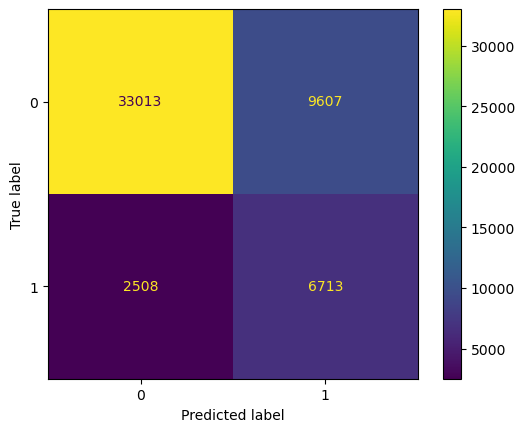

##################################################################


In [318]:
acc = accuracy_score(y_train, y_pred_train)
f1 = f1_score(y_train, y_pred_train)
recall = recall_score(y_train, y_pred_train)
bal_acc = balanced_accuracy_score(y_train, y_pred_train)
precision= precision_score(y_train, y_pred_train)
roc_auc = roc_auc_score(y_train, y_pred_train)



print("Accuracy", f"{acc:.4f}")
print("Precision", f"{precision:.4f}")
print("F1 Score", f"{f1:.4f}")
print("Recall", f"{recall:.4f}")
print("Balanced Accuracy", f"{bal_acc:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")



# Classification Report
print("##################################################################")
print("**Classification Report:**")
print(classification_report(y_train, y_pred_train))

print("##################################################################")


# Confusion Matrix
print("**Confusion Matrix:**")
cm_train = confusion_matrix(y_train, y_pred_train, labels=model.classes_)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=model.classes_)

# disp_train.plot()
# plt.show()
print("##################################################################")
fig, ax = plt.subplots()
disp_train.plot(ax=ax)
st.pyplot(fig)
plt.show()
print("##################################################################")


# Test Model Results

# Comparision Table

In [319]:
# Comparison table
# Sample data for development and validation (replace with actual data)
development_data = pd.DataFrame({
    'Decile':[1,2,3,4,5,6,7,8,9,10],
    'Bad': ks_table_train['Bad'],
    'Good': ks_table_train['Good']
})

validation_data = {
    month: pd.DataFrame({
        'Bad': ks_tables_test[f"KS_TABLE_{month}"]['Bad'],
        'Good': ks_tables_test[f"KS_TABLE_{month}"]['Good']
    })
    for month in test_months
}

# validation_data

# Helper function to calculate cumulative and derived values
def calculate_metrics(data):
    total_bad = data['Bad'].sum()
    total_good = data['Good'].sum()

    data['Total'] = data['Bad'] + data['Good']
    data['Cumulative Bad'] = data['Bad'].cumsum()
    data['Cumulative Good'] = data['Good'].cumsum()
    data['Cumulative Bad%'] = data['Cumulative Bad'] / total_bad
    data['Cumulative Good%'] = data['Cumulative Good'] / total_good
    data['Bad Rate'] = data['Bad'] / data['Total']
    data['%Bad'] = data['Bad'] / total_bad
    data['%Good'] = data['Good'] / total_good
    data['KS'] = data['Cumulative Bad%']-data['Cumulative Good%']
    # Add an 'AUC' column to the DataFrame for transparency
    data['AUC'] =(data['Cumulative Good%'] / 2) * (data['Cumulative Bad%'])
    for i in range(1, len(data)):
        data.at[i, 'AUC'] = ((data['Cumulative Good%'][i] + data['Cumulative Good%'][i-1]) / 2) * (data['Cumulative Bad%'][i] - data['Cumulative Bad%'][i-1])
    data['Rank'] = data['Bad Rate'].rank(ascending=False)
    data['Gini'] =''


    return data, total_bad, total_good

# Calculate for development data
dev_data, dev_total_bad, dev_total_good = calculate_metrics(development_data)

# Calculate for validation data (for each month)
validation_metrics = {}
for month, val_data in validation_data.items():
    val_data, _, _ = calculate_metrics(val_data)
    validation_metrics[month] = val_data



# # Calculate ROB (Rank of Best) for each month
for month, val_data in validation_metrics.items():
    val_data['ROB'] = (dev_data['Rank'] != val_data['Rank']).astype(int)

# # Calculate ROB (Rank of Best) for each month
for month, val_data in validation_metrics.items():
    val_data['Gini'] = ''


# Combine Development Set and Validation Sets side by side
combined_data = dev_data.copy()
for month, val_data in validation_metrics.items():
    # Align the validation data with the development data by index (assuming same number of rows)
    val_data = val_data.rename(columns=lambda x: f"{x} ({month})")  # Rename columns to distinguish months
    combined_data = pd.concat([combined_data, val_data], axis=1)


# Add an overall total row at the end
overall_totals = pd.DataFrame({
        'Decile': ['Overall'],
        'Bad': combined_data['Bad'].sum(axis=0),
        'Good': combined_data['Good'].sum(axis=0),
        'Total': combined_data['Total'].sum(axis=0),
        'Bad Rate': combined_data['Bad'].sum(axis=0)/combined_data['Total'].sum(axis=0),
        '%Bad': combined_data['%Bad'].sum(axis=0),
        '%Good': combined_data['%Good'].sum(axis=0),
        'KS': combined_data['KS'].max(),
        'AUC': combined_data['AUC'].sum(axis=0),
        'Gini': abs(1 - 2 * combined_data['AUC'].sum(axis=0)),

        **{f"Bad ({month})": combined_data[f"Bad ({month})"].sum(axis=0) for month in validation_metrics},
        **{f"Good ({month})": combined_data[f"Good ({month})"].sum(axis=0) for month in validation_metrics},
        **{f"Total ({month})": combined_data[f"Total ({month})"].sum(axis=0) for month in validation_metrics},
        **{f"Bad Rate ({month})": combined_data[f"Bad ({month})"].sum(axis=0)/combined_data[f"Total ({month})"].sum(axis=0) for month in validation_metrics},
        **{f"%Bad ({month})": combined_data[f"%Bad ({month})"].sum(axis=0) for month in validation_metrics},
        **{f"%Good ({month})": combined_data[f"%Good ({month})"].sum(axis=0) for month in validation_metrics},
        **{f"KS ({month})": combined_data[f"KS ({month})"].max() for month in validation_metrics},
        **{f"AUC ({month})": combined_data[f"AUC ({month})"].sum(axis=0) for month in validation_metrics},
        **{f"ROB ({month})": combined_data[f"ROB ({month})"].sum(axis=0)/combined_data[f"ROB ({month})"].count() for month in validation_metrics},
        **{f"Gini ({month})": (abs(1-2*(combined_data[f"AUC ({month})"].sum(axis=0)))) for month in validation_metrics}
})

# Append the overall totals row at the end of the combined data
combined_data_with_totals = pd.concat([combined_data, overall_totals], ignore_index=True)

# Display the final combined data with the overall totals row
combined_data_with_totals


,Decile,Bad,Good,Total,Cumulative Bad,Cumulative Good,Cumulative Bad%,Cumulative Good%,Bad Rate,%Bad,...,Cumulative Bad% (MAR25),Cumulative Good% (MAR25),Bad Rate (MAR25),%Bad (MAR25),%Good (MAR25),KS (MAR25),AUC (MAR25),Rank (MAR25),Gini (MAR25),ROB (MAR25)
0,1,3370.0,1814.0,5184.0,3370.0,1814.0,0.365470,0.042562,0.650077,0.365470,...,0.270053,0.062138,0.668874,0.270053,0.062138,0.207916,0.008390,1.0,,0.0
1,2,2068.0,3116.0,5184.0,5438.0,4930.0,0.589741,0.115673,0.398920,0.224271,...,0.395722,0.129246,0.465347,0.125668,0.067109,0.266476,0.012025,3.0,,1.0
2,3,1132.0,4052.0,5184.0,6570.0,8982.0,0.712504,0.210746,0.218364,0.122763,...,0.566845,0.210025,0.496124,0.171123,0.080779,0.356820,0.029029,2.0,,1.0
3,4,805.0,4379.0,5184.0,7375.0,13361.0,0.799805,0.313491,0.155285,0.087301,...,0.661319,0.304060,0.318318,0.094474,0.094035,0.357259,0.024284,4.0,,0.0
4,5,558.0,4626.0,5184.0,7933.0,17987.0,0.860319,0.422032,0.107639,0.060514,...,0.759358,0.407622,0.305556,0.098039,0.103563,0.351736,0.034886,5.0,,0.0
5,6,413.0,4771.0,5184.0,8346.0,22758.0,0.905108,0.533975,0.079668,0.044789,...,0.821747,0.506214,0.227273,0.062389,0.098592,0.315533,0.028506,6.0,,0.0
6,7,304.0,4880.0,5184.0,8650.0,27638.0,0.938076,0.648475,0.058642,0.032968,...,0.873440,0.618061,0.176829,0.051693,0.111848,0.255379,0.029059,7.0,,0.0
7,8,267.0,4917.0,5184.0,8917.0,32555.0,0.967032,0.763843,0.051505,0.028956,...,0.902852,0.703397,0.138075,0.029412,0.085336,0.199455,0.019433,9.0,,1.0
8,9,170.0,5014.0,5184.0,9087.0,37569.0,0.985468,0.881488,0.032793,0.018436,...,0.948307,0.857912,0.120283,0.045455,0.154515,0.090394,0.035484,10.0,,1.0
9,10,134.0,5051.0,5185.0,9221.0,42620.0,1.000000,1.000000,0.025844,0.014532,...,1.000000,1.000000,0.144638,0.051693,0.142088,0.000000,0.048021,8.0,,1.0


In [320]:
cumulative_bad_columns = list(combined_data_with_totals.columns[(combined_data_with_totals.columns.str.startswith("Cumulative Bad%"))|(combined_data_with_totals.columns.str.startswith("Bad Rate"))|(combined_data_with_totals.columns.str.startswith("ROB"))])
# bad_rate_columns=combined_data_with_totals.columns[combined_data_with_totals.columns.str.startswith("Bad Rate")]

# cumulative_bad_columns=['Decile']+cumulative_bad_columns
# print(cumulative_bad_columns)
combined_data_with_totals_V1=combined_data_with_totals[["Decile"]+cumulative_bad_columns]

combined_data_with_totals_V1

,Decile,Cumulative Bad%,Bad Rate,Cumulative Bad% (JAN25),Bad Rate (JAN25),ROB (JAN25),Cumulative Bad% (FEB25),Bad Rate (FEB25),ROB (FEB25),Cumulative Bad% (MAR25),Bad Rate (MAR25),ROB (MAR25)
0,1,0.365470,0.650077,0.334286,0.558473,0.0,0.382075,0.505198,0.0,0.270053,0.668874,0.0
1,2,0.589741,0.398920,0.522857,0.373938,0.0,0.575472,0.316195,0.0,0.395722,0.465347,1.0
2,3,0.712504,0.218364,0.655714,0.231343,0.0,0.721698,0.235443,0.0,0.566845,0.496124,1.0
3,4,0.799805,0.155285,0.774286,0.194836,0.0,0.816038,0.151515,0.0,0.661319,0.318318,0.0
4,5,0.860319,0.107639,0.867143,0.147727,0.0,0.904088,0.137592,0.0,0.759358,0.305556,0.0
5,6,0.905108,0.079668,0.904286,0.081250,0.0,0.940252,0.064972,0.0,0.821747,0.227273,0.0
6,7,0.938076,0.058642,0.927143,0.041237,1.0,0.965409,0.040100,1.0,0.873440,0.176829,0.0
7,8,0.967032,0.051505,0.938571,0.031250,1.0,0.981132,0.040486,1.0,0.902852,0.138075,1.0
8,9,0.985468,0.032793,0.978571,0.068796,1.0,0.993711,0.018100,0.0,0.948307,0.120283,1.0
9,10,1.000000,0.025844,1.000000,0.038265,1.0,1.000000,0.010753,0.0,1.000000,0.144638,1.0


# PSI table

In [321]:
# Decile name

Decile='Decile'



def calculate_psi_multiple_tests(train_df, test_dfs, total_pop_col_train, total_pop_cols_test):
    """
    Calculate PSI for multiple test datasets compared to a single train dataset.

    Parameters:
    - train_df: DataFrame for the train KS table.
    - test_dfs: Dictionary of DataFrames for the test KS tables, where keys are test month labels.
    - total_pop_col_train: Column name for total population in the train table.
    - total_pop_cols_test: Dictionary where keys are test month labels, and values are column names for total population in each test table.

    Returns:
    - psi_table: Combined PSI table for all test months.

    """

    # Validate matching keys
    missing_keys = [month for month in test_dfs if month not in total_pop_cols_test]
    if missing_keys:
        raise KeyError(f"Missing keys in total_pop_cols_test for months: {missing_keys}")
    # Ensure the train DataFrame is sorted by decile
    train_df = train_df.sort_values(by=Decile).reset_index(drop=True)
    
    
    # Calculate total train population and population percentage per decile
    total_train_pop = train_df[total_pop_col_train].sum()
    train_df['Train Population %'] = train_df[total_pop_col_train] / total_train_pop
    
    # Initialize the PSI table with train data columns
    psi_table = pd.DataFrame({
        Decile: train_df[Decile],
        'Train Total Population': train_df[total_pop_col_train],
        'Train Population %': train_df['Train Population %']
    })
    
    # Dictionary to store total PSI values for each month
    total_psi_values = {}

    # Calculate PSI for each test month
    for month, test_df in test_dfs.items():
        # st.write("**`Test Month:`**",month)
        # st.write(test_df)
        # st.write(test_dfs)
        # st.write(total_pop_cols_test)
        test_df = test_df.sort_values(by=Decile).reset_index(drop=True)

        
        
        # Calculate total test population and population percentage per decile
        total_test_pop = test_df[total_pop_cols_test[month]].sum()
        test_df['Test Population %'] = test_df[total_pop_cols_test[month]] / total_test_pop
        
        # Calculate PSI for each decile in this test month
        psi_values = (psi_table['Train Population %'] - test_df['Test Population %']) * \
                    np.log(psi_table['Train Population %'] / test_df['Test Population %'])
        
        # Add columns for the test month's population and PSI values
        psi_table[f'{month} Test Total Population'] = test_df[total_pop_cols_test[month]]
        psi_table[f'{month} Test Population %'] = test_df['Test Population %']
        psi_table[f'{month} PSI'] = psi_values
        
        # Store the total PSI for this month
        total_psi_values[month] = psi_values.sum()
    
    # Calculate overall decision based on maximum PSI across all months
    max_total_psi = max(total_psi_values.values())
    if max_total_psi < 0.1:
        psi_decision = 'Stable'
    elif max_total_psi < 0.25:
        psi_decision = 'On Watch'
    else:
        psi_decision = 'Unstable'
    
    # Create a single Total row with the sum of populations and percentages
    total_row = pd.DataFrame({
        Decile: ['Total'],
        'Train Total Population': [train_df[total_pop_col_train].sum()],
        'Train Population %': [train_df['Train Population %'].sum()],
        **{f'{month} Test Total Population': [test_dfs[month][total_pop_cols_test[month]].sum()] for month in test_dfs},
        **{f'{month} Test Population %': [psi_table[f'{month} Test Population %'].sum()] for month in test_dfs},
        **{f'{month} PSI': [total_psi_values[month]] for month in test_dfs}
    })

    # Create a single Decision row with the PSI decision
    decision_row = pd.DataFrame({
        Decile: ['Decision'],
        'Train Total Population': [''],
        'Train Population %': [''],
        **{f'{month} Test Total Population': [''] for month in test_dfs},
        **{f'{month} Test Population %': [''] for month in test_dfs},
        **{f'{month} PSI': [psi_decision] for month in test_dfs}
    })
    
    # Concatenate the PSI table with the single Total and Decision rows
    psi_table = pd.concat([psi_table, total_row, decision_row], ignore_index=True)
    return psi_table


# Automatically extract short month labels (e.g., "Jan" from "JAN25")
def get_short_month(month_code):
    return month_code[:3].capitalize()  # 'JAN' → 'Jan'


# Build train_df dynamically
train_df = ks_table_train

# # Automatically extract short month labels (e.g., "Jan" from "JAN25")
# def get_short_month(month_code):
#     return month_code[:3].capitalize()  # 'JAN' → 'Jan'



# Build test_dfs and total_pop_cols_test dynamically
test_dfs = {
    monthss: ks_tables_test[f"KS_TABLE_{monthss}"]
    for monthss in test_months
}
# test_dfs

# st.write(test_dfs)

total_pop_cols_test = {
    monthss: 'Total Population'
    for monthss in test_months
}
# total_pop_cols_test

# Calculate PSI for multiple test datasets compared to a single train dataset and View test data

# with st.expander("**`View PSI table`**",icon="📅"):
psi_table = calculate_psi_multiple_tests(train_df, test_dfs, 'Total Population', total_pop_cols_test)

# Display the PSI table
psi_table

,Decile,Train Total Population,Train Population %,JAN25 Test Total Population,JAN25 Test Population %,JAN25 PSI,FEB25 Test Total Population,FEB25 Test Population %,FEB25 PSI,MAR25 Test Total Population,MAR25 Test Population %,MAR25 PSI
0,1,5184,0.1,419.0,0.110176,0.000986,481.0,0.123905,0.005124,453.0,0.128111,0.006964
1,2,5184,0.1,353.0,0.092821,0.000535,389.0,0.100206,0.0,303.0,0.08569,0.00221
2,3,5184,0.1,402.0,0.105706,0.000317,395.0,0.101752,0.00003,387.0,0.109446,0.000853
3,4,5184,0.1,426.0,0.112017,0.001364,396.0,0.102009,0.00004,333.0,0.094174,0.00035
4,5,5184,0.1,440.0,0.115698,0.002289,407.0,0.104843,0.000229,360.0,0.10181,0.000032
5,6,5184,0.1,320.0,0.084144,0.002737,354.0,0.09119,0.000812,308.0,0.087104,0.00178
6,7,5184,0.1,388.0,0.102025,0.000041,399.0,0.102782,0.000076,328.0,0.09276,0.000544
7,8,5184,0.1,256.0,0.067315,0.012936,247.0,0.063627,0.016445,239.0,0.06759,0.012695
8,9,5184,0.1,407.0,0.107021,0.000476,442.0,0.113859,0.001799,424.0,0.11991,0.003615
9,10,5184,0.1,392.0,0.103077,0.000093,372.0,0.095827,0.000178,401.0,0.113405,0.001686


# KS table train

In [322]:
ks_table_train

,Decile,Total Population,Max Probability,Min Probability,Good,Bad,Good %,Bad %,Cumulative Good %,Cumulative Bad %,Difference
0,1,5184,0.730282,0.443679,1814.0,3370.0,0.042562,0.365470,0.042562,0.365470,0.322908
1,2,5184,0.443679,0.279553,3116.0,2068.0,0.073111,0.224271,0.115673,0.589741,0.474067
2,3,5184,0.279497,0.198102,4052.0,1132.0,0.095073,0.122763,0.210746,0.712504,0.501758
3,4,5184,0.198102,0.146908,4379.0,805.0,0.102745,0.087301,0.313491,0.799805,0.486313
4,5,5184,0.146908,0.111341,4626.0,558.0,0.108541,0.060514,0.422032,0.860319,0.438287
5,6,5184,0.111341,0.081634,4771.0,413.0,0.111943,0.044789,0.533975,0.905108,0.371133
6,7,5184,0.081634,0.062728,4880.0,304.0,0.114500,0.032968,0.648475,0.938076,0.289601
7,8,5184,0.062728,0.057806,4917.0,267.0,0.115368,0.028956,0.763843,0.967032,0.203189
8,9,5184,0.057806,0.048824,5014.0,170.0,0.117644,0.018436,0.881488,0.985468,0.103980
9,10,5184,0.048824,0.028121,5051.0,134.0,0.118512,0.014532,1.000000,1.000000,0.000000


# KS TEST

In [323]:
for  ks_table_test1 in test_months:

    ks_table_test2=ks_tables_test[f"KS_TABLE_{ks_table_test1}"]
    # st.write(ks_table_test2)
    # Display KS table for selected test month
    print("#######################################################################")
    print(f"**`KS Table for {ks_table_test1}:`**")
    print(ks_table_test2)
    print("#######################################################################")


#######################################################################
**`KS Table for JAN25:`**
   Decile  Total Population Max Probability Min Probability   Good    Bad  \
0       1             419.0        0.730282        0.443679  185.0  234.0   
1       2             353.0        0.443679        0.279553  221.0  132.0   
2       3             402.0        0.279497        0.198102  309.0   93.0   
3       4             426.0        0.198102        0.146908  343.0   83.0   
4       5             440.0        0.146908        0.111341  375.0   65.0   
5       6             320.0        0.111341        0.081634  294.0   26.0   
6       7             388.0        0.081634        0.062728  372.0   16.0   
7       8             256.0        0.062728        0.057806  248.0    8.0   
8       9             407.0        0.057806        0.048824  379.0   28.0   
9      10             392.0        0.048824        0.028121  377.0   15.0   

     Good %     Bad %  Cumulative Good %  Cumulative B

### Train Data

In [324]:
# # Train evaluation metrics
# train_evaluation_df = pd.DataFrame({
#     'Model Name': [model],
#     'Target_Variable': [selected__target_column],
#     'Optimal_Threshold': [optimal_threshold],
#     'ROC_AUC SCORE': [roc_auc],
#     'Accuracy': [accuracy_score(y_train, y_pred_train)],
#     'Precision': [precision_score(y_train, y_pred_train)],
#     'Recall': [recall_score(y_train, y_pred_train)],
#     'F1_Score': [f1_score(y_train, y_pred_train)],
#     'Balanced_Accuracy': [balanced_accuracy_score(y_train, y_pred_train)],
#     'Variable Used in model':[top_features]
# })

# # ----------------------
# # 2. Create Train Confusion Matrix DataFrame
# # ----------------------

# cm_train = confusion_matrix(y_train, y_pred_train, labels=model.classes_)
# train_confusion_matrix_df = pd.DataFrame(
#     cm_train,
#     index=[f"Actual_{cls}" for cls in model.classes_],
#     columns=[f"Predicted_{cls}" for cls in model.classes_]
# )


# # ----------------------
# # 4. Prepare KS Tables (train and tests)
# # ----------------------

# # Train KS Table
# train_ks_table = ks_table_train



In [325]:
###
# Train evaluation metrics
train_evaluation_df = pd.DataFrame({
    'Model Name': [model],
    'Target_Variable': ['TARGET'],
    'Optimal_Threshold': [optimal_threshold],
    'Accuracy': [accuracy_score(y_train, y_pred_train)],
    'Precision': [precision_score(y_train, y_pred_train)],
    'Recall': [recall_score(y_train, y_pred_train)],
    'F1_Score': [f1_score(y_train, y_pred_train)],
    'Balanced_Accuracy': [balanced_accuracy_score(y_train, y_pred_train)],
    'Variable Used in model':[top_features]
})

# ----------------------
# 2. Create Train Confusion Matrix DataFrame
# ----------------------

cm_train = confusion_matrix(y_train, y_pred_train, labels=model.classes_)
train_confusion_matrix_df = pd.DataFrame(
    cm_train,
    index=[f"Actual_{cls}" for cls in model.classes_],
    columns=[f"Predicted_{cls}" for cls in model.classes_]
)

# ----------------------
# 3. Create Test Evaluation DataFrames
# ----------------------

test_evaluation_dfs = {}
# st.write(month_column)



for months in test_months:
    test_data = DATA[DATA[month_column] == months]
    
    X_test = test_data.drop(drop_columns, axis=1)
    X_test = X_test[top_features]
    y_test = test_data[selected__target_column]
    
    y_prob_cutoff_test = model.predict_proba(X_test)[:, 1]
    y_pred_test = np.where(y_prob_cutoff_test >= optimal_threshold, 1, 0)

    test_evaluation_df = pd.DataFrame({
        'Target_Variable': [selected__target_column],
        'Month': [months],
        'Optimal_Threshold': [optimal_threshold],
        'Accuracy': [accuracy_score(y_test, y_pred_test)],
        'Precision': [precision_score(y_test, y_pred_test)],
        'Recall': [recall_score(y_test, y_pred_test)],
        'F1_Score': [f1_score(y_test, y_pred_test)],
        'Balanced_Accuracy': [balanced_accuracy_score(y_test, y_pred_test)]
    })
    
    test_evaluation_dfs[months] = test_evaluation_df


    confusion_test= confusion_matrix(y_test, y_pred_test, labels=model.classes_)
    test_confusion_matrix_df = pd.DataFrame(
        confusion_test,index=[f"Actual_{cls}" for cls in model.classes_],
        columns=[f"Predicted_{cls}" for cls in model.classes_])

# ----------------------
# 4. Prepare KS Tables (train and tests)
# ----------------------

# Train KS Table
train_ks_table = ks_table_train

# Test KS Tables
test_ks_tables = {}
for month in test_months:
    test_ks_tables[month] = ks_tables_test[f"KS_TABLE_{month}"]

# Export File

In [337]:
# Clean name1 and model
name1_clean = file_name_main.replace(" ", "_")
model_clean = models.replace(" ", "_")



# Final CSV
final_data_csv = final_data.to_csv(f"{path_main}\{name1_clean}_final_data_with_probability.csv",index=False)
    
# Create Excel with multiple sheets
excel_buffer = io.BytesIO()
with pd.ExcelWriter(rf"{path_main}\{name1_clean}_{model_clean}_model_summary.xlsx", engine='xlsxwriter') as writer:

    #PSI table
    psi_table.to_excel(writer, sheet_name='PSI_Table', index=False)
    # Comparision Table
    combined_data_with_totals.to_excel(writer, sheet_name='Comparison_Table', index=False)

    # KS Tables
    train_ks_table.to_excel(writer, sheet_name="Train_KS_Table", index=False)
    for month, df in test_ks_tables.items():
        safe_month = month.replace("/", "-").replace(" ", "_")
        df.to_excel(writer, sheet_name=f"Test_KS_{safe_month}", index=False)

    # Train Results
    train_evaluation_df.to_excel(writer, sheet_name='Train_Evaluation', index=False)
    train_confusion_matrix_df.to_excel(writer, sheet_name='Train_Confusion_Matrix', index=True)

    # Test Results
    for month, df in test_evaluation_dfs.items():
        safe_month = month.replace("/", "-").replace(" ", "_")  # safe sheet name
        df.to_excel(writer, sheet_name=f"Test_Evaluation_{safe_month}", index=False)
        test_confusion_matrix_df.to_excel(writer, sheet_name=f"Test_Confusion_Matrix_{safe_month}", index=True)

    
    # # KS Tables
    # train_ks_table.to_excel(writer, sheet_name="Train_KS_Table", index=False)
    
    # # Train Results
    # train_evaluation_df.to_excel(writer, sheet_name='Train_Evaluation', index=False)
    # train_confusion_matrix_df.to_excel(writer, sheet_name='Train_Confusion_Matrix', index=True)

        
        
    

<string>:8: SyntaxWarning: invalid escape sequence '\{'
<>:8: SyntaxWarning: invalid escape sequence '\{'
<string>:8: SyntaxWarning: invalid escape sequence '\{'
<>:8: SyntaxWarning: invalid escape sequence '\{'
C:\Users\524264.CORP\AppData\Local\Temp\ipykernel_20108\3901054403.py:8: SyntaxWarning: invalid escape sequence '\{'
  final_data_csv = final_data.to_csv(f"{path_main}\{name1_clean}_final_data_with_probability.csv",index=False)


# Save the model

In [336]:

import pickle

# Clean name1 and model
name1_clean = file_name_main.replace(" ", "_")
model_clean = models.replace(" ", "_")

  
# Save the Modle to file in the current working directory

Pkl_Filename = rf"{path_main}\{name1_clean}_{model_clean}_model_Pickle file.pkl"  

with open(Pkl_Filename, 'wb') as file:  
   pickle.dump(model, file)

#                               Model Comparision

# Folder Path and files

In [328]:
threshold=optimal_threshold

# Target columns
target_columns=selected__target_column
# target_columns='TARGET'

# New Probability Column
new_probability="Probability"

# Existing model probability column
existing_probability="Pred_Score_1"



# All file location
folder_path_comparision=rf"D:\Pranto\Working\Collection Model\Collection New Model\3 to 3 Plus PV\Data\V1\3 to 3 Plus MHCV\Comparision"
# folder_path_comparision=rf"C:\Users\524264.CORP\Downloads"

# New model File name
# new_model_file_name=rf"2_TO_2_PLUS_ILCV_model_DEC23_TO_MAR25_Overall_Apply_binning_data_final_data_with_probability"


# new_model_file_name=rf"val_jan_ilcv"

# file1=rf"Final_Datav1_jan"

# files=[file1]
# month_name=['JAN25']

# Existing File name
file1=rf"Final_Datav1_JAN25 V1"

file2=rf"Final_Datav1_FEB25 V1"

file3=rf"Final_Datav1_MAR25 V1"



# Existing model files
files=[file1,file2,file3]
month_name=['JAN25','FEB25','MAR25']


# Export File name
export_file_name=rf"3_TO_3_PLUS_MHCV_model_JAN24_TO_MAR25_New Model"



## Read Files

In [329]:
new_model_df=final_data

# try:
#     new_model_df=pd.read_csv(rf"{folder_path_comparision}\{new_model_file_name}.csv",encoding='latin-1')
# except:
#     new_model_df=pd.read_excel(rf"{folder_path_comparision}\{new_model_file_name}.xlsx")



print("######################################################################")

print("New model file Shape ",new_model_df.shape)
print("New model file Columns ",new_model_df.columns)

print("######################################################################")

dataframes={}

for file,month1 in zip(files,month_name):
    try:
        df_file=pd.read_csv(rf"{folder_path_comparision}\{file}.csv",encoding='latin-1')
        df_file['MONTH']=month1
        dataframes[month1]=df_file

        print("######################################################################")

        print(rf"{month1} file Shape ",df_file.shape)
        print(rf"{month1} Columns ",df_file.columns)

        print("######################################################################")

    except:
        df_file=pd.read_excel(rf"{folder_path_comparision}\{file}.xlsx")
        df_file['MONTH']=month1
        dataframes[month1]=df_file
        print("######################################################################")

        print(rf"{month1} file Shape ",df_file.shape)
        print(rf"{month1} Columns ",df_file.columns)

        print("######################################################################")


existing_model_df = pd.concat(dataframes.values(), ignore_index=True)

print("######################################################################")

print("Existing model shape",existing_model_df.shape)
print("Existing model columns",existing_model_df.columns)
print("######################################################################")


# Merge the new model data with the existing model data on CONNO and MONTH
merged_df = pd.merge(new_model_df, existing_model_df[['CONNO','MONTH',existing_probability]], on=["CONNO", "MONTH"], how="inner")


print("######################################################################")

print("After Merging model shape",merged_df.shape)
print("After Merging model columns",merged_df.columns)
print("######################################################################")

######################################################################
New model file Shape  (63089, 18)
New model file Columns  Index(['CONNO', 'BPNO', 'ODBKT', 'SOHPOD', 'SOHPOD_PREASSIGN', 'MONTH',
       'TARGET_VARIABLE_V1', 'CountInBkt_3_6M_WOE', 'DSA_DLR_WOE',
       'nuof_EMI_L6M_WOE', 'Roll_stable_6_WOE', 'due_date_WOE', 'BRANCH_WOE',
       'IRR_CUSTOMER_WOE', 'CUST_SEG_WOE', 'MOB_WOE', 'Decile', 'Probability'],
      dtype='object')
######################################################################
######################################################################
JAN25 file Shape  (102133, 18)
JAN25 Columns  Index(['CONNO', 'BPNO', 'COMPANY_CODE', 'ODBKT', 'PRODUCT', 'Decile',
       'ASSET_CATEGORY2', 'Pred_Score_1', 'HML', 'SEGMENT', 'SC', 'Identifier',
       'Analytics', 'PP', 'CIBIL', 'Risk_Allocation1', 'triggers', 'MONTH'],
      dtype='object')
######################################################################
############################################

In [330]:
target_columns

'TARGET_VARIABLE_V1'

In [331]:
merged_df

,CONNO,BPNO,ODBKT,SOHPOD,SOHPOD_PREASSIGN,MONTH,TARGET_VARIABLE_V1,CountInBkt_3_6M_WOE,DSA_DLR_WOE,nuof_EMI_L6M_WOE,Roll_stable_6_WOE,due_date_WOE,BRANCH_WOE,IRR_CUSTOMER_WOE,CUST_SEG_WOE,MOB_WOE,Decile,Probability,Pred_Score_1
0,5002959726,2003488713,3,8681.460,8681.46,JAN25,0,-0.154861,0.249121,1.210690,0.028918,0.373119,-0.196424,0.233621,0.067404,0.241530,6.0,0.110261,0.111702
1,5002976088,2003508745,3,152278.690,152278.69,JAN25,0,1.292611,1.197053,1.210690,1.408391,-0.498302,0.799456,0.233621,-0.313896,0.241530,10.0,0.039888,0.039594
2,5003006506,2003536319,3,11143.924,111439.24,JAN25,1,-0.154861,0.249121,0.143916,0.028918,-0.498302,-1.259325,0.233621,-0.313896,0.241530,4.0,0.165396,0.420072
3,5003011285,2003537539,3,8056.510,80565.10,JAN25,0,-0.154861,-0.618913,-0.888531,-0.944580,-0.498302,0.181258,0.233621,-0.313896,0.241530,3.0,0.247788,0.321166
4,5003011902,2002646422,3,44975.000,44975.00,JAN25,0,-0.154861,0.249121,0.143916,0.028918,-0.498302,0.181258,0.233621,0.067404,0.241530,5.0,0.131733,0.275776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11243,8000284053,2004651249,3,2056623.370,2056623.37,MAR25,1,-0.154861,4.034564,-0.888531,-0.632639,0.373119,1.737223,0.233621,0.067404,-1.276676,6.0,0.108668,0.454622
11244,8000284292,2004151679,3,2357413.220,2357413.22,MAR25,1,-1.094024,-2.037547,-0.888531,-0.632639,0.373119,-1.259325,0.233621,0.067404,-1.276676,1.0,0.673250,0.423123
11245,8000285993,2004660657,3,2034896.690,2034896.69,MAR25,1,-1.094024,-2.037547,-0.888531,-0.632639,-0.498302,-1.259325,-0.725185,-0.313896,-1.276676,1.0,0.716305,0.438237
11246,8000287621,2004664236,3,1254014.600,1254014.60,MAR25,0,-1.094024,4.034564,-0.888531,-0.632639,-0.498302,0.799456,-0.725185,-0.313896,-1.276676,3.0,0.248459,0.360567


# Comparision

In [332]:



# Evaluation function
def evaluate_model(y_true, y_prob, threshold=threshold, top_pct=0.3):
    df = pd.DataFrame({'y_true': y_true, 'y_prob': y_prob})
    df['y_pred'] = (df['y_prob'] >= threshold).astype(int)
    cutoff = int(len(df) * top_pct)
    df_sorted = df.sort_values('y_prob', ascending=False).reset_index(drop=True)
    top_bads = df_sorted.iloc[:cutoff]['y_true'].sum()
    total_bads = df['y_true'].sum()
    capture_rate = top_bads / total_bads if total_bads else 0
    lift = (top_bads / cutoff) / (total_bads / len(df)) if total_bads else 0

    return {
        'AUC': roc_auc_score(y_true, y_prob),
        'Accuracy': accuracy_score(y_true, df['y_pred']),
        'Precision': precision_score(y_true, df['y_pred']),
        'Recall': recall_score(y_true, df['y_pred']),
        'F1 Score': f1_score(y_true, df['y_pred']),
        'Top_30%_Bad_Capture_Rate': capture_rate,
        'Lift_Top_30%': lift
    }


def calculate_group_metrics(df, target_column, probability_column):
    """
    Calculate metrics for High, Medium, and Low probability groups.
    """
    # Create probability-based groups
    df = df.copy()
    high_threshold = df[probability_column].quantile(0.7)
    low_threshold = df[probability_column].quantile(0.3)

    conditions = [
        df[probability_column] > high_threshold,
        (df[probability_column] > low_threshold) & (df[probability_column] <= high_threshold),
        df[probability_column] <= low_threshold
    ]
    choices = ['High', 'Medium', 'Low']
    df['Group'] = np.select(conditions, choices, default='Unknown')

    # Initialize metrics
    metrics = []

    total_population = len(df)
    total_bads = df[target_column] .sum()

    for group in ['High', 'Medium', 'Low']:
        group_data = df[df['Group'] == group]
        total = len(group_data)
        good = (group_data[target_column] == 0).sum()
        bad = (group_data[target_column] == 1).sum()
        bad_rate = bad / total if total > 0 else 0
        population_pct = total / total_population if total_population > 0 else 0
        bad_capture_rate = bad / total_bads if total_bads > 0 else 0
        lift = bad_rate / (total_bads / total_population) if total_population > 0 and total_bads > 0 else 0

        metrics.append({
            'Group': group,
            'Good': good,
            'Bad': bad,
            'Total': total,
            'Bad Rate': round(bad_rate, 4),
            'Bad Capture Rate': round(bad_capture_rate, 4),
            'Population %': round(population_pct, 4),
            'Lift': round(lift, 2)
        })

    return pd.DataFrame(metrics)




results = []
group_metrics_all_months = []

for month2 in month_name:
    temp = merged_df[merged_df['MONTH'] == month2]
    
    # For New Model metrics
    metrics_new = evaluate_model(temp[target_columns], temp[new_probability])
    metrics_new.update({'Month': month2, 'Model': 'NEW_MODEL'})
    results.append(metrics_new)
    
    # For Existing Model metrics
    metrics_existing = evaluate_model(temp[target_columns], temp[existing_probability])
    metrics_existing.update({'Month': month2, 'Model': 'EXISTING_MODEL'})
    results.append(metrics_existing)
    
    # Group Metrics for New Model
    group_metrics_new = calculate_group_metrics(temp, target_columns, new_probability)
    group_metrics_new['Model'] = 'NEW_MODEL'
    group_metrics_new['Month'] = month2
    group_metrics_all_months.append(group_metrics_new)

    # Group Metrics for Existing Model
    group_metrics_existing = calculate_group_metrics(temp, target_columns, existing_probability)
    group_metrics_existing['Model'] = 'EXISTING_MODEL'
    group_metrics_existing['Month'] = month2
    group_metrics_all_months.append(group_metrics_existing)

# Convert performance results into a DataFrame
results_df = pd.DataFrame(results)

results_df_V1=results_df[['Month', 'Model', 'AUC', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 
                  'Top_30%_Bad_Capture_Rate', 'Lift_Top_30%']]

# Combine the group metrics from all months
group_metrics_df = pd.concat(group_metrics_all_months, ignore_index=True)

group_metrics_df_V1=group_metrics_df[['Month', 'Model', 'Group', 'Good', 'Bad', 'Total', 'Bad Rate', 
                        'Bad Capture Rate', 'Population %', 'Lift']]





### Performance Metrics

In [333]:

results_df_V1


,Month,Model,AUC,Accuracy,Precision,Recall,F1 Score,Top_30%_Bad_Capture_Rate,Lift_Top_30%
0,JAN25,NEW_MODEL,0.787075,0.738045,0.378577,0.661429,0.481539,0.648571,2.163421
1,JAN25,EXISTING_MODEL,0.684512,0.472937,0.236694,0.838571,0.369182,0.507143,1.691661
2,FEB25,NEW_MODEL,0.814483,0.738383,0.355253,0.738994,0.479837,0.694969,2.317554
3,FEB25,EXISTING_MODEL,0.672235,0.425674,0.206454,0.885220,0.334820,0.477987,1.593973
4,MAR25,NEW_MODEL,0.735427,0.713279,0.544081,0.577540,0.560311,0.540107,1.800526
5,MAR25,EXISTING_MODEL,0.611129,0.482098,0.354970,0.779857,0.487873,0.396613,1.322168


#### Group Metrics

In [334]:

group_metrics_df_V1

,Month,Model,Group,Good,Bad,Total,Bad Rate,Bad Capture Rate,Population %,Lift
0,JAN25,NEW_MODEL,High,687,454,1141,0.3979,0.6486,0.2998,2.16
1,JAN25,NEW_MODEL,Medium,1329,194,1523,0.1274,0.2771,0.4002,0.69
2,JAN25,NEW_MODEL,Low,1090,52,1142,0.0455,0.0743,0.3001,0.25
3,JAN25,EXISTING_MODEL,High,770,355,1125,0.3156,0.5071,0.2956,1.72
4,JAN25,EXISTING_MODEL,Medium,1287,252,1539,0.1637,0.3600,0.4044,0.89
5,JAN25,EXISTING_MODEL,Low,1049,93,1142,0.0814,0.1329,0.3001,0.44
6,FEB25,NEW_MODEL,High,726,442,1168,0.3784,0.6950,0.2999,2.32
7,FEB25,NEW_MODEL,Medium,1390,167,1557,0.1073,0.2626,0.3997,0.66
8,FEB25,NEW_MODEL,Low,1143,27,1170,0.0231,0.0425,0.3004,0.14
9,FEB25,EXISTING_MODEL,High,862,304,1166,0.2607,0.4780,0.2994,1.60


# Export Comparision Table

In [338]:
   
# Create Excel with multiple sheets
excel_buffer = io.BytesIO()
with pd.ExcelWriter(rf"{folder_path_comparision}\{export_file_name}_{model_clean}_Model_Comparision.xlsx", engine='xlsxwriter') as writer:

    #PSI table
    group_metrics_df_V1.to_excel(writer, sheet_name='Group Metrics', index=False)
    # Comparision Table
    results_df_V1.to_excel(writer, sheet_name='Evaluation Metrics', index=False)


In [298]:
# model_results=st.selectbox("",["Train Data","Test Data"],key='model_result')
#     if model_results == "Train Data":
#         # Streamlit UI: select train month
#         # Evaluation metrics
#         acc = accuracy_score(y_train, y_pred_train)
#         f1 = f1_score(y_train, y_pred_train)
#         recall = recall_score(y_train, y_pred_train)
#         bal_acc = balanced_accuracy_score(y_train, y_pred_train)
#         precision= precision_score(y_train, y_pred_train)

#         st.divider()

#         col1,col2,col3,col4,col5=st.columns(5)
#         with col1:
#             st.metric("Accuracy", f"{acc:.4f}")
#         with col2:
#             st.metric("Precision", f"{precision:.4f}")
#         with col3:
#             st.metric("F1 Score", f"{f1:.4f}")
#         with col4:
#             st.metric("Recall", f"{recall:.4f}")
#         with col5:
#             st.metric("Balanced Accuracy", f"{bal_acc:.4f}")
#         # # Display metrics
#         # st.write(f"**Accuracy:** `{acc:.4f}`")
#         # st.write(f"**F1 Score:** `{f1:.4f}`")
#         # st.write(f"**Recall:** `{recall:.4f}`")
#         # st.write(f"**Balanced Accuracy:** `{bal_acc:.4f}`")

#         # Create dataframe of metrics
#         metrics_df_train = pd.DataFrame({
#             'Metric': ['Accuracy', 'F1 Score', 'Recall', 'Balanced Accuracy'],
#             'Score': [acc, f1, recall, bal_acc]
#         })

#         # Show as table
#         # st.dataframe(metrics_df_train, use_container_width=True)

#         # # Export as CSV
#         # csv = metrics_df.to_csv(index=False).encode('utf-8')
#         # st.download_button("📥 Download Metrics CSV", csv, "train_metrics.csv", "text/csv")

#         st.markdown("---")
#         st.write("**Classification Report:**")
#         st.code(classification_report(y_train, y_pred_train))

#         # Confusion Matrix
#         st.write("**Confusion Matrix:**")
#         cm_train = confusion_matrix(y_train, y_pred_train, labels=model.classes_)
#         disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=model.classes_)

#         fig, ax = plt.subplots()
#         disp_train.plot(ax=ax)
#         st.pyplot(fig)
#         pass

#     # For test months
#     else:
#         st.info("**`There is only train data for model building`**")
        


# st.divider()

# #############%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# #############%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


# #############%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# #############%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

# # View KS table
# st.markdown("<h2 style='color: #334fff; font-size: 30px;'>View KS table</h2>", unsafe_allow_html=True)

# # EXPANDER FOR KS TABLE
# with st.expander("**`View KS Table table`**",icon="📅"):

#     ks_table_train_test=st.selectbox("**`Select KS table for train and test data`**",["Train Data","Test Data"],key='ks_table')

#     if ks_table_train_test == "Train Data":
#         # Display KS table for training data
#         st.write("**KS Table for Training Data:**")
#         st.dataframe(ks_table_train, use_container_width=True)
#     else:
#         st.info("**`There is only train data for model building`**")


# # download all results
# ##############################################################################################

# ###
# # Train evaluation metrics
# train_evaluation_df = pd.DataFrame({
#     'Model Name': [model],
#     'Target_Variable': ['TARGET'],
#     'Optimal_Threshold': [optimal_threshold],
#     'Accuracy': [accuracy_score(y_train, y_pred_train)],
#     'Precision': [precision_score(y_train, y_pred_train)],
#     'Recall': [recall_score(y_train, y_pred_train)],
#     'F1_Score': [f1_score(y_train, y_pred_train)],
#     'Balanced_Accuracy': [balanced_accuracy_score(y_train, y_pred_train)],
#     'Variable Used in model':[top_features]
# })

# # ----------------------
# # 2. Create Train Confusion Matrix DataFrame
# # ----------------------

# cm_train = confusion_matrix(y_train, y_pred_train, labels=model.classes_)
# train_confusion_matrix_df = pd.DataFrame(
#     cm_train,
#     index=[f"Actual_{cls}" for cls in model.classes_],
#     columns=[f"Predicted_{cls}" for cls in model.classes_]
# )


# # ----------------------
# # 4. Prepare KS Tables (train and tests)
# # ----------------------

# # Train KS Table
# train_ks_table = ks_table_train



# # ----------------------
# # 5. Export everything into a ZIP
# # ----------------------

# # Clean name1 and model
# name1_clean = name1.replace(" ", "_")
# model_clean = models.replace(" ", "_")

# # Create in-memory zip file
# zip_buffer = io.BytesIO()
# # name1_clean = name1.replace(" ", "_")

# with zipfile.ZipFile(zip_buffer, "w") as zip_file:

#     # Final CSV
#     final_data_csv = final_data.to_csv(index=False)
#     zip_file.writestr(f"{name1_clean}_final_data_with_probability.csv", final_data_csv)

#     # Create Excel with multiple sheets
#     excel_buffer = io.BytesIO()
#     with pd.ExcelWriter(excel_buffer, engine='xlsxwriter') as writer:
        
#         # KS Tables
#         train_ks_table.to_excel(writer, sheet_name="Train_KS_Table", index=False)
        
#         # Train Results
#         train_evaluation_df.to_excel(writer, sheet_name='Train_Evaluation', index=False)
#         train_confusion_matrix_df.to_excel(writer, sheet_name='Train_Confusion_Matrix', index=True)

        
        
#     # Save Excel inside ZIP
#     zip_file.writestr(f"{name1_clean}_{model_clean}_model_summary.xlsx", excel_buffer.getvalue())

# # ----------------------
# # 6. Download Button in Streamlit
# # ----------------------

# st.success("✅ All data prepared successfully!")

# st.divider()

# st.download_button(
#     label="**`📩 Download Results ZIP ⬇`**",
#     data=zip_buffer.getvalue(),
#     file_name=f"{name1_clean}_model_results.zip",
#     mime="application/zip"
# )

# st.divider()

# #############%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# #############%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


In [209]:
# # Function to calculate metrics for probability percentiles (High, Medium, Low)
# def calculate_group_metrics(df, y_true, y_prob, percentile_1=0.3, percentile_2=0.7):
#     # df = pd.DataFrame({'y_true': y_true, 'y_prob': y_prob})
#     # Assign groups based on probability percentiles
#     low_threshold = df[y_prob].quantile(percentile_1)
#     high_threshold = df[y_prob].quantile(percentile_2)
    
#     df['Group'] = 'Low'
#     df.loc[df[y_prob] > high_threshold, 'Group'] = 'High'
#     df.loc[(df[y_prob] > low_threshold) & (df[y_prob] <= high_threshold), 'Group'] = 'Medium'
    
#     # Group-based metrics calculation
#     metrics = []
#     for group in ['High', 'Medium', 'Low']:
#         group_data = df[df['Group'] == group]
#         total = len(group_data)
#         good = (group_data['y_true'] == 0).sum()
#         bad = (group_data['y_true'] == 1).sum()
#         bad_rate = bad / total if total > 0 else 0
#         bad_capture_rate = bad / df['y_true'].sum() if df['y_true'].sum() > 0 else 0
#         population_pct = total / len(df)
#         lift = bad_capture_rate / (total / len(df)) if total > 0 else 0

#         metrics.append({
#             'Group': group,
#             'Good': good,
#             'Bad': bad,
#             'Total': total,
#             'Bad Rate': bad_rate,
#             'Bad Capture Rate': bad_capture_rate,
#             'Population%': population_pct,
#             'Lift': lift
#         })
    
#     return pd.DataFrame(metrics)

# Combine all metrics results
# results = []
# for month2 in month_name:
#     temp = merged_df[merged_df['MONTH'] == month2]
    
#     # For New Model metrics
#     metrics_new = evaluate_model(temp[target_columns], temp[new_probability])
#     metrics_new.update({'Month': month2, 'Model': 'NEW_MODEL'})
#     results.append(metrics_new)
    
#     # For Existing Model metrics
#     metrics_existing = evaluate_model(temp[target_columns], temp[existing_probability])
#     metrics_existing.update({'Month': month2, 'Model': 'EXISTING_MODEL'})
#     results.append(metrics_existing)

# # Convert results into a DataFrame
# results_df = pd.DataFrame(results)

# # Print the final table with all metrics for both models
# print("Model Performance Comparison (AUC, Accuracy, Precision, Recall, F1 Score, Top 30% Bad Capture Rate, Lift):")
# print(results_df[['Month', 'Model', 'AUC', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 
#                   'Top_30%_Bad_Capture_Rate', 'Lift_Top_30%']])

# # Now calculate and display metrics for High, Medium, and Low probability groups
# group_metrics_new = calculate_group_metrics(merged_df, target_columns, new_probability)
# group_metrics_new['Model'] = 'NEW_MODEL'

# group_metrics_existing = calculate_group_metrics(merged_df, target_columns, existing_probability)
# group_metrics_existing['Model'] = 'EXISTING_MODEL'

# # Combine the group metrics
# group_metrics_df = pd.concat([group_metrics_new, group_metrics_existing], ignore_index=True)

# # Display the group metrics table
# print("\nHigh, Medium, Low Group Metrics for Both Models:")
# group_metrics_df[['Model', 'Group', 'Good', 'Bad', 'Total', 'Bad Rate', 
#                         'Bad Capture Rate', 'Population %', 'Lift']]


In [210]:
# # Comparison table
# # Sample data for development and validation (replace with actual data)
# development_data = pd.DataFrame({
#     'Decile':[1,2,3,4,5,6,7,8,9,10],
#     'Bad': ks_table_train['Good'],
#     'Good': ks_table_train['Bad']
# })

# validation_data = {
#     month: pd.DataFrame({
#         'Bad': ks_tables_test[f"KS_TABLE_{month}"]['Good'],
#         'Good': ks_tables_test[f"KS_TABLE_{month}"]['Bad']
#     })
#     for month in test_months
# }

# # validation_data

# # Helper function to calculate cumulative and derived values
# def calculate_metrics(data):
#     total_bad = data['Bad'].sum()
#     total_good = data['Good'].sum()

#     data['Total'] = data['Bad'] + data['Good']
#     data['Cumulative Bad'] = data['Bad'].cumsum()
#     data['Cumulative Good'] = data['Good'].cumsum()
#     data['Cumulative Bad%'] = data['Cumulative Bad'] / total_bad
#     data['Cumulative Good%'] = data['Cumulative Good'] / total_good
#     data['Good Rate'] = data['Good'] / data['Total']
#     data['%Bad'] = data['Bad'] / total_bad
#     data['%Good'] = data['Good'] / total_good
#     data['KS'] = data['Cumulative Good%'] - data['Cumulative Bad%']
#     # Add an 'AUC' column to the DataFrame for transparency
#     data['AUC'] =(data['Cumulative Good%'] / 2) * (data['Cumulative Bad%'])
#     for i in range(1, len(data)):
#         data.at[i, 'AUC'] = ((data['Cumulative Good%'][i] + data['Cumulative Good%'][i-1]) / 2) * (data['Cumulative Bad%'][i] - data['Cumulative Bad%'][i-1])
#     data['Rank'] = data['Good Rate'].rank(ascending=False)
#     data['Gini'] =''


#     return data, total_bad, total_good

# # Calculate for development data
# dev_data, dev_total_bad, dev_total_good = calculate_metrics(development_data)

# # Calculate for validation data (for each month)
# validation_metrics = {}
# for month, val_data in validation_data.items():
#     val_data, _, _ = calculate_metrics(val_data)
#     validation_metrics[month] = val_data



# # # Calculate ROB (Rank of Best) for each month
# for month, val_data in validation_metrics.items():
#     val_data['ROB'] = (dev_data['Rank'] != val_data['Rank']).astype(int)

# # # Calculate ROB (Rank of Best) for each month
# for month, val_data in validation_metrics.items():
#     val_data['Gini'] = ''


# # Combine Development Set and Validation Sets side by side
# combined_data = dev_data.copy()
# for month, val_data in validation_metrics.items():
#     # Align the validation data with the development data by index (assuming same number of rows)
#     val_data = val_data.rename(columns=lambda x: f"{x} ({month})")  # Rename columns to distinguish months
#     combined_data = pd.concat([combined_data, val_data], axis=1)


# # Add an overall total row at the end
# overall_totals = pd.DataFrame({
#         'Decile': ['Overall'],
#         'Bad': combined_data['Bad'].sum(axis=0),
#         'Good': combined_data['Good'].sum(axis=0),
#         'Total': combined_data['Total'].sum(axis=0),
#         'Good Rate': combined_data['Good'].sum(axis=0)/combined_data['Total'].sum(axis=0),
#         '%Bad': combined_data['%Bad'].sum(axis=0),
#         '%Good': combined_data['%Good'].sum(axis=0),
#         'KS': combined_data['KS'].max(),
#         'AUC': combined_data['AUC'].sum(axis=0),
#         'Gini': abs(1 - 2 * combined_data['AUC'].sum(axis=0)),

#         **{f"Bad ({month})": combined_data[f"Bad ({month})"].sum(axis=0) for month in validation_metrics},
#         **{f"Good ({month})": combined_data[f"Good ({month})"].sum(axis=0) for month in validation_metrics},
#         **{f"Total ({month})": combined_data[f"Total ({month})"].sum(axis=0) for month in validation_metrics},
#         **{f"Good Rate ({month})": combined_data[f"Good ({month})"].sum(axis=0)/combined_data[f"Total ({month})"].sum(axis=0) for month in validation_metrics},
#         **{f"%Bad ({month})": combined_data[f"%Bad ({month})"].sum(axis=0) for month in validation_metrics},
#         **{f"%Good ({month})": combined_data[f"%Good ({month})"].sum(axis=0) for month in validation_metrics},
#         **{f"KS ({month})": combined_data[f"KS ({month})"].max() for month in validation_metrics},
#         **{f"AUC ({month})": combined_data[f"AUC ({month})"].sum(axis=0) for month in validation_metrics},
#         **{f"ROB ({month})": combined_data[f"ROB ({month})"].sum(axis=0)/combined_data[f"ROB ({month})"].count() for month in validation_metrics},
#         **{f"Gini ({month})": (abs(1-2*(combined_data[f"AUC ({month})"].sum(axis=0)))) for month in validation_metrics}
# })

# # Append the overall totals row at the end of the combined data
# combined_data_with_totals = pd.concat([combined_data, overall_totals], ignore_index=True)

# # Display the final combined data with the overall totals row
# combined_data_with_totals
